# Lab 1: Logistic Regression

## Lab Instruction 

In this lab, you are to create a logistic regression model to predict the sale price of <br>
houses (Low, High) from a given set of attributes. <br>
The data file is`lab1_dataset.csv` <br>
Note that you need to explore and process/drop attributes, <br>
and map numerical values of sale prices to categorical values (Low, High)

###  1. Import the Dataset and Learn About the Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
dataSet = pd.read_csv('lab1_dataset.csv')
print('data dimension: ', dataSet.shape)

data dimension:  (1460, 22)


In [2]:
dataSet.head()

,Id,Foundation,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,GarageYrBlt,...,BsmtFinType1,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,Fence,SalePrice
0,1,PConc,856,Gd,0,Ex,2,Gd,61,2003.0,...,GLQ,2003,548,8,2,1710,2003,65.0,NaN,208500
1,2,CBlock,1262,TA,1,Ex,2,Gd,0,1976.0,...,ALQ,1976,460,6,2,1262,1976,80.0,NaN,181500
2,3,PConc,920,Gd,1,Ex,2,Gd,42,2001.0,...,GLQ,2001,608,6,2,1786,2002,68.0,NaN,223500
3,4,BrkTil,961,Gd,1,Gd,1,TA,35,1998.0,...,ALQ,1915,642,7,3,1717,1970,60.0,NaN,140000
4,5,PConc,1145,Gd,1,Ex,2,Gd,84,2000.0,...,GLQ,2000,836,9,3,2198,2000,84.0,NaN,250000


In [3]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
Id              1460 non-null int64
Foundation      1460 non-null object
1stFlrSF        1460 non-null int64
KitchenQual     1460 non-null object
Fireplaces      1460 non-null int64
HeatingQC       1460 non-null object
FullBath        1460 non-null int64
BsmtQual        1423 non-null object
OpenPorchSF     1460 non-null int64
GarageYrBlt     1379 non-null float64
ExterQual       1460 non-null object
OverallQual     1460 non-null int64
BsmtFinType1    1423 non-null object
YearBuilt       1460 non-null int64
GarageArea      1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
GrLivArea       1460 non-null int64
YearRemodAdd    1460 non-null int64
LotFrontage     1201 non-null float64
Fence           281 non-null object
SalePrice       1460 non-null int64
dtypes: float64(2), int64(13), object(7)
memory usage: 251.0+ KB


In [4]:
dataSet.isnull().sum()

Id                 0
Foundation         0
1stFlrSF           0
KitchenQual        0
Fireplaces         0
HeatingQC          0
FullBath           0
BsmtQual          37
OpenPorchSF        0
GarageYrBlt       81
ExterQual          0
OverallQual        0
BsmtFinType1      37
YearBuilt          0
GarageArea         0
TotRmsAbvGrd       0
GarageCars         0
GrLivArea          0
YearRemodAdd       0
LotFrontage      259
Fence           1179
SalePrice          0
dtype: int64

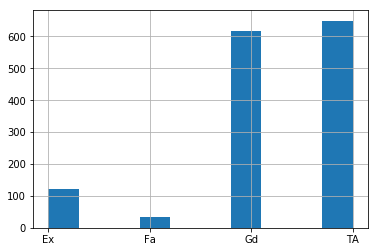

In [5]:
dataSet.BsmtQual.hist()

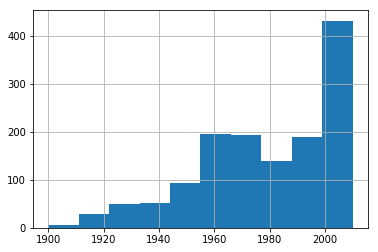

In [6]:
dataSet.GarageYrBlt.hist()

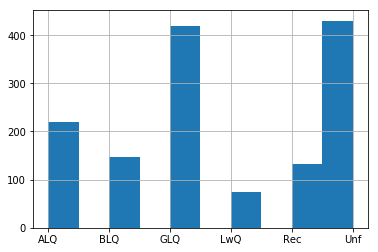

In [7]:
dataSet.BsmtFinType1.hist()

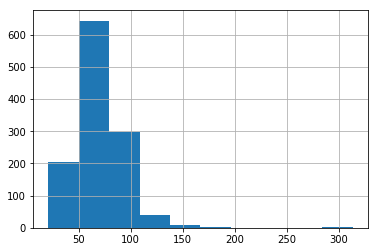

In [8]:
dataSet.LotFrontage.hist()

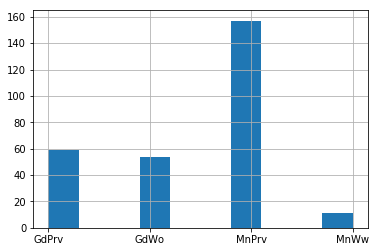

In [9]:
dataSet.Fence.hist()

###  2. Preprocessing

Use techniques that you have learned to preprocess the data. For example, 
-  Remove non-informative features
-  Remove features with too many NA
-  Remove rows with incomplete data
-  Remove features with highly unbalanced labels
-  Encode categorical variables as appropriate

In [10]:
dataSet1 = dataSet

In [11]:
del(dataSet1['Fence'])

In [12]:
del(dataSet1['Id'])

In [13]:
LotFrontageMed = dataSet1.LotFrontage.median()
dataSet1['LotFrontage'].fillna(LotFrontageMed,inplace=True)

In [14]:
dataSet1.isnull().sum()

Foundation       0
1stFlrSF         0
KitchenQual      0
Fireplaces       0
HeatingQC        0
FullBath         0
BsmtQual        37
OpenPorchSF      0
GarageYrBlt     81
ExterQual        0
OverallQual      0
BsmtFinType1    37
YearBuilt        0
GarageArea       0
TotRmsAbvGrd     0
GarageCars       0
GrLivArea        0
YearRemodAdd     0
LotFrontage      0
SalePrice        0
dtype: int64

In [15]:
GarageYrBltMean = dataSet1.LotFrontage.mean()
dataSet1['GarageYrBlt'].fillna(GarageYrBltMean,inplace=True)

In [16]:
dataSet1.dropna(how='any',inplace=True)

In [17]:
CleanQualityDict = {'KitchenQual':{'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},
                    'HeatingQC': {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},
                    'BsmtQual' : {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},
                    'ExterQual': {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}}
dataSet1.replace(CleanQualityDict,inplace=True)
CleanBsmtType = {'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}}
dataSet1.replace(CleanBsmtType,inplace=True)
dataSet1.head()

,Foundation,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,GarageYrBlt,ExterQual,OverallQual,BsmtFinType1,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,SalePrice
0,PConc,856,3,0,4,2,3,61,2003.0,3,7,6,2003,548,8,2,1710,2003,65.0,208500
1,CBlock,1262,2,1,4,2,3,0,1976.0,2,6,5,1976,460,6,2,1262,1976,80.0,181500
2,PConc,920,3,1,4,2,3,42,2001.0,3,7,6,2001,608,6,2,1786,2002,68.0,223500
3,BrkTil,961,3,1,3,1,2,35,1998.0,2,7,5,1915,642,7,3,1717,1970,60.0,140000
4,PConc,1145,3,1,4,2,3,84,2000.0,3,8,6,2000,836,9,3,2198,2000,84.0,250000


In [18]:
dataSet2 = pd.get_dummies(dataSet1,columns = ['Foundation'])
dataSet2.head()

,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,GarageYrBlt,ExterQual,OverallQual,...,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,SalePrice,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood
0,856,3,0,4,2,3,61,2003.0,3,7,...,2,1710,2003,65.0,208500,0,0,1,0,0
1,1262,2,1,4,2,3,0,1976.0,2,6,...,2,1262,1976,80.0,181500,0,1,0,0,0
2,920,3,1,4,2,3,42,2001.0,3,7,...,2,1786,2002,68.0,223500,0,0,1,0,0
3,961,3,1,3,1,2,35,1998.0,2,7,...,3,1717,1970,60.0,140000,1,0,0,0,0
4,1145,3,1,4,2,3,84,2000.0,3,8,...,3,2198,2000,84.0,250000,0,0,1,0,0


In [19]:
data4 = pd.qcut(dataSet2.SalePrice,q = [0,0.5,1],labels=[0,1])

In [20]:
dataSet2.head()

,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,GarageYrBlt,ExterQual,OverallQual,...,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,SalePrice,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood
0,856,3,0,4,2,3,61,2003.0,3,7,...,2,1710,2003,65.0,208500,0,0,1,0,0
1,1262,2,1,4,2,3,0,1976.0,2,6,...,2,1262,1976,80.0,181500,0,1,0,0,0
2,920,3,1,4,2,3,42,2001.0,3,7,...,2,1786,2002,68.0,223500,0,0,1,0,0
3,961,3,1,3,1,2,35,1998.0,2,7,...,3,1717,1970,60.0,140000,1,0,0,0,0
4,1145,3,1,4,2,3,84,2000.0,3,8,...,3,2198,2000,84.0,250000,0,0,1,0,0


In [21]:
trainData_X = dataSet2.drop(['SalePrice'],axis = 1)
trainData_Y = data4


### 3. Model Training 
We will use Scikit-learn package to build a model.
- http://scikit-learn.org/stable/

Model Evaluation Method
- Split into train set and test set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(trainData_X, trainData_Y,
test_size = 0.4, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(853, 23) (853,)
(570, 23) (570,)


- Fit Logistic Regression model

In [26]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
yhat_train = lr.predict(X_train)

### 4. Model Tuning &  Result Analysis 

Analyze the model results. Do you think the model is good enough? <br>
#model is good enough the accuracy is more than 0.9 <br>
Does it overfit or underfit the data? <br>
#the model is underfit the data the accuracy from test dataset is not very different from train dataset<br>
Explain and provide evidence to support your claims.


In [28]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,yhat_train)
print ("acc = ",acc_train)

acc =  0.928487690504


In [29]:
yhat_test = lr.predict(X_test)
acc_test = accuracy_score(y_test,yhat_test)
print("acc = ",acc_test)

acc =  0.910526315789


In [30]:
from sklearn.metrics import confusion_matrix
print('confusion metrics for train datasets\n')
print(confusion_matrix(y_train,yhat_train))
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_train, yhat_train)
precision = precision_score(y_train, yhat_train)
recall = recall_score(y_train, yhat_train)
f1 = f1_score(y_train, yhat_train)
print('\n\n\n--- train dataset---')
print("Accuracy : %1.4f" % accuracy)
print("Precision : %1.4f" % precision)
print("Recall : %1.4f" % recall)
print("F1 : %1.4f" % f1)

confusion metrics for train datasets

[[406  30]
 [ 31 386]]



--- train dataset---
Accuracy : 0.9285
Precision : 0.9279
Recall : 0.9257
F1 : 0.9268


In [31]:
print('confusion metrics for test datasets\n')
print(confusion_matrix(y_test,yhat_test))
accuracy = accuracy_score(y_test, yhat_test)
precision = precision_score(y_test, yhat_test)
recall = recall_score(y_test, yhat_test)
f1 = f1_score(y_test, yhat_test)
print('\n\n\n--- test dataset---')
print("Accuracy : %1.4f" % accuracy)
print("Precision : %1.4f" % precision)
print("Recall : %1.4f" % recall)
print("F1 : %1.4f" % f1)

confusion metrics for test datasets

[[258  23]
 [ 28 261]]



--- test dataset---
Accuracy : 0.9105
Precision : 0.9190
Recall : 0.9031
F1 : 0.9110


In [32]:
#model is good enough the accuracy is more than 0.9 
#the model is underfit the data the accuracy from test dataset is not very different from train dataset
#

### 5. (Optional) Mutlinomial Logistic Regression Model

Binning the sale price into three classes : `Low`, `Medium`, `High`.
Then, apply the logistic regression model and evaluate the model performance. <br>
See http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [73]:
data5 = pd.qcut(dataSet2.SalePrice,q = [0,1/3,2/3,1],labels=[0,1,2])

In [74]:
trainData_X2 = dataSet2.drop(['SalePrice'],axis = 1)
trainData_Y2 = data5


In [75]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(trainData_X2, trainData_Y2,
test_size = 0.4, random_state = 0)

In [76]:
sc_x = StandardScaler()
X_train2 = sc_x.fit_transform(X_train2)
X_test2 = sc_x.transform(X_test2)

In [77]:
lr2 = linear_model.LogisticRegression()
lr2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
yhat_train2 = lr.predict(X_train2)

In [79]:
acc_train = accuracy_score(y_train2,yhat_train2)
print ("acc = ",acc_train)

acc =  0.474794841735


In [80]:
yhat_test2 = lr.predict(X_test2)
acc_test = accuracy_score(y_test2,yhat_test2)
print("acc = ",acc_test)

acc =  0.484210526316


In [85]:
print('confusion metrics for train datasets\n')
print(confusion_matrix(y_train2,yhat_train2))
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_train2, yhat_train2)
precision = precision_score(y_train2, yhat_train2,average='micro')
recall = recall_score(y_train2, yhat_train2,average='micro')
f1 = f1_score(y_train2, yhat_train2,average='micro')
print('\n\n\n--- train dataset---')
print("Accuracy : %1.4f" % accuracy)
print("Precision : %1.4f" % precision)
print("Recall : %1.4f" % recall)
print("F1 : %1.4f" % f1)

confusion metrics for train datasets

[[276   8   0]
 [157 129   0]
 [  4 279   0]]



--- train dataset---
Accuracy : 0.4748
Precision : 0.4748
Recall : 0.4748
F1 : 0.4748


In [86]:
print('confusion metrics for test datasets\n')
print(confusion_matrix(y_test2,yhat_test2))
accuracy = accuracy_score(y_test2, yhat_test2)
precision = precision_score(y_test2, yhat_test2,average='micro')
recall = recall_score(y_test2, yhat_test2,average='micro')
f1 = f1_score(y_test2, yhat_test2,average='micro')
print('\n\n\n--- test dataset---')
print("Accuracy : %1.4f" % accuracy)
print("Precision : %1.4f" % precision)
print("Recall : %1.4f" % recall)
print("F1 : %1.4f" % f1)

confusion metrics for test datasets

[[185   7   0]
 [ 97  91   0]
 [  4 186   0]]



--- test dataset---
Accuracy : 0.4842
Precision : 0.4842
Recall : 0.4842
F1 : 0.4842


In [ ]:
#the accuracy is lower than 2 classes
#the model is still underfit

In [ ]:
#Tanin Immanothai 58070501027